In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def compare_datasets(file1, file2, metric, x_label, y_label, title, label):
    # Read the CSV files
    data1 = pd.read_csv(file1)
    data2 = pd.read_csv(file2)
    
    # Make sure that 'metric' exists in both dataframes
    if metric not in data1.columns or metric not in data2.columns:
        raise ValueError(f"The metric '{metric}' was not found in both files.")
    
    # Assign a new column for row numbers for hue
    data1['row_number'] = data1.index
    data2['row_number'] = data2.index
    
    # Extract the metrics and row numbers into a new dataframe for Seaborn
    combined_data = pd.DataFrame({
        f'{metric}_file1': data1[metric],
        f'{metric}_file2': data2[metric],
        'row_number': range(len(data1))  # Assuming both files have the same number of rows
    })
    
    # Plot using seaborn
    plt.figure(figsize=(10, 7))
    plot = sns.scatterplot(
        data=combined_data,
        x=f'{metric}_file1',
        y=f'{metric}_file2',
        hue='row_number',
        palette='viridis',
        legend='brief'
    )
    
    # Set the scale to logarithmic if the data is not linear
    plot.set(xscale="log", yscale="log")
    
    # Adding a diagonal line for reference
    max_value = max(combined_data[f'{metric}_file1'].max(), combined_data[f'{metric}_file2'].max())
    min_value = min(combined_data[f'{metric}_file1'].min(), combined_data[f'{metric}_file2'].min())
    plt.plot([min_value, max_value], [min_value, max_value], 'k--', lw=1)
    
    # Set labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Create a color bar for the row numbers
    norm = plt.Normalize(0, len(data1))
    sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=plot.axes)
    cbar.set_label(label)

    # Set the label of the legend to label
    legend = plot.legend(title=label)

    plt.grid(True)
    plt.show()

# This is a placeholder and the function should be run with actual data.
# compare_datasets_with_bar('your_file1.csv', 'your_file2.csv', 'metric_to_compare', 'X-axis label', 'Y-axis label', 'Title')



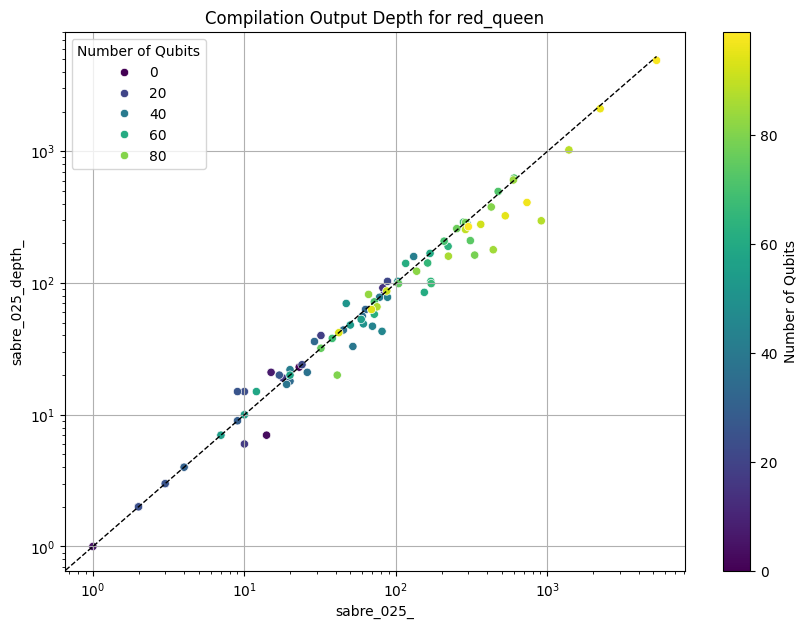

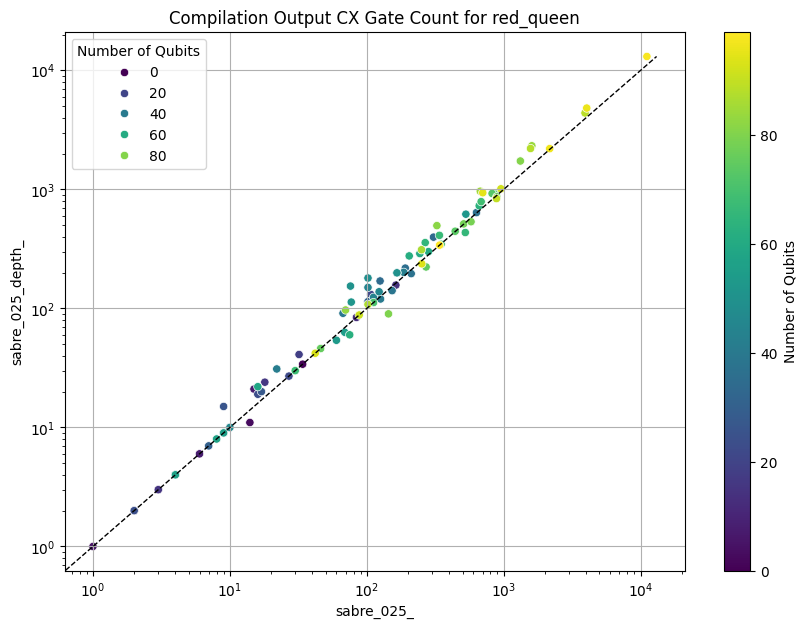

In [8]:
circuit_name = "red_queen"

file1 = "sabre_025_"
file2 = "sabre_025_depth_"
filename1 = f'results/{circuit_name}/{file1}.csv'
filename2 = f'results/{circuit_name}/{file2}.csv'
metric = 'depth'
x_label = file1
y_label = file2
title = f'Compilation Output Depth for {circuit_name}'
label = 'Number of Qubits'
compare_datasets(filename1, filename2, metric, x_label, y_label, title, label)
metric = 'cx gates'
title = f'Compilation Output CX Gate Count for {circuit_name}'
compare_datasets(filename1, filename2, metric, x_label, y_label, title, label)

